In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load your CSV data
data = pd.read_csv('C:/Users/aryand/Downloads/Crop_recommendation (1).csv')
data = data.dropna(axis=1)

# Separate the target variable (Nitrogen) and independent variables, including 'Label' for one-hot encoding
y = data['Nitrogen']
X = data.drop(columns=['Nitrogen'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create preprocessing steps for categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

numerical_transformer = 'passthrough'  # No transformation needed for numerical data

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and a Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


# Calculate the residuals (differences) between true and predicted values
residuals = y_test - y_pred

# Create a scatter plot to visualize the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, c='blue', marker='o', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Zero Residual Line')
plt.xlabel('True Nitrogen Values')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\aryand\.conda\envs\CIS890\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 152.4140222727273
R-squared (R2): 0.8780306208863266


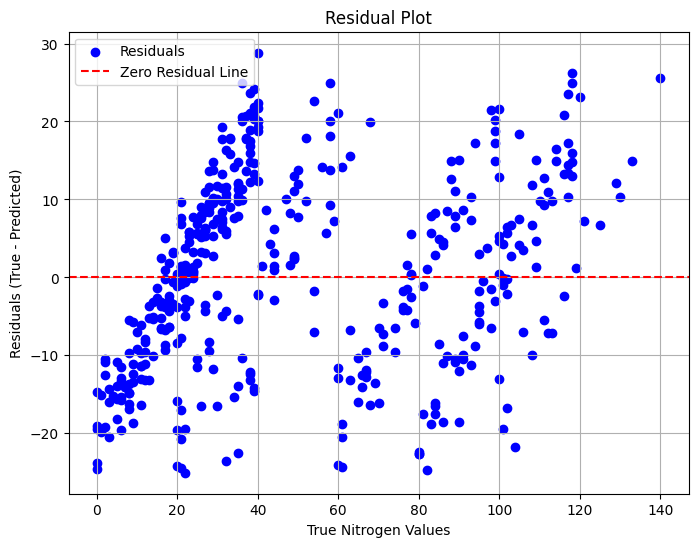

In [6]:
cccccccccccc

Regression Model: Linear Regression
Mean Squared Error: 1149.897084238161
R-squared (R2): 0.0797944223387349
--------------------------------------------------
Regression Model: Ridge Regression
Mean Squared Error: 1149.8974778531208
R-squared (R2): 0.07979410734821402
--------------------------------------------------
Regression Model: Lasso Regression
Mean Squared Error: 1152.7113886235024
R-squared (R2): 0.07754227418728232
--------------------------------------------------
Regression Model: SVR
Mean Squared Error: 1262.7697529916368
R-squared (R2): -0.010531973628496338
--------------------------------------------------
Regression Model: Random Forest Regression
Mean Squared Error: 178.16730613636364
R-squared (R2): 0.8574215457097312
--------------------------------------------------
Regression Model: Gradient Boosting Regression
Mean Squared Error: 257.2043944234403
R-squared (R2): 0.7941720858399728
--------------------------------------------------
The best-performing model is:

In [24]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

# Define the list of allowed crop types
allowed_crop_types = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
    'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
    'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
    'jute', 'coffee'
]

# Create an empty DataFrame to store user inputs
user_data = pd.DataFrame(columns=['ph', 'rainfall', 'temperature', 'humidity', 'phosphorus', 'potassium', 'label'])

def predict_nitrogen():
    # Get values from the input fields
    ph_value = ph_entry.get()
    rainfall_value = rainfall_entry.get()
    temperature_value = temperature_entry.get()
    humidity_value = humidity_entry.get()
    phosphorus_value = phosphorus_entry.get()
    potassium_value = potassium_entry.get()
    label_value = label_entry.get()

    # Check if the entered label is in the allowed crop types
    if label_value not in allowed_crop_types:
        label_value = "Invalid Crop Type"

    # Append the user inputs to the user_data DataFrame
    user_data.loc[len(user_data)] = [ph_value, rainfall_value, temperature_value, humidity_value, phosphorus_value, potassium_value, label_value]

    # Print the user inputs
#     print("User Input Data:")
#     print(user_data)

    # Perform predictions on the user_data
    user_predictions = regression_model.predict(user_data)

    # Display the predicted Nitrogen value
    result_label.config(text="Predicted Nitrogen Value: {:.2f}".format(user_predictions[0]))

# Create a Tkinter window
window = tk.Tk()
window.title("Nitrogen Prediction")

# Create labels and entry fields for input
ph_label = ttk.Label(window, text="pH:")
ph_label.pack()
ph_entry = ttk.Entry(window)
ph_entry.pack()

rainfall_label = ttk.Label(window, text="Rainfall (mm):")
rainfall_label.pack()
rainfall_entry = ttk.Entry(window)
rainfall_entry.pack()

temperature_label = ttk.Label(window, text="Temperature (°C):")
temperature_label.pack()
temperature_entry = ttk.Entry(window)
temperature_entry.pack()

humidity_label = ttk.Label(window, text="Humidity (%):")
humidity_label.pack()
humidity_entry = ttk.Entry(window)
humidity_entry.pack()

phosphorus_label = ttk.Label(window, text="Phosphorus (mg/kg):")
phosphorus_label.pack()
phosphorus_entry = ttk.Entry(window)
phosphorus_entry.pack()

potassium_label = ttk.Label(window, text="Potassium (mg/kg):")
potassium_label.pack()
potassium_entry = ttk.Entry(window)
potassium_entry.pack()

label_label = ttk.Label(window, text="Crop Type:")
label_label.pack()
label_entry = ttk.Entry(window)
label_entry.pack()

# Create a static label for accepted values
accepted_values_label = ttk.Label(window, text="Accepted values: " + ', '.join(allowed_crop_types))
accepted_values_label.pack()

# Create a button to predict Nitrogen
predict_button = ttk.Button(window, text="Predict Nitrogen", command=predict_nitrogen)
predict_button.pack()

# Create a label to display the result
result_label = ttk.Label(window, text="")
result_label.pack()

# Start the Tkinter main loop
window.mainloop()


User Input Data:
   ph rainfall temperature humidity phosphorus potassium   label
0  32       12          35       43         22        56  lentil
